In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 

In [2]:
df = pd.read_csv('BankChurners.csv')

## Removing Columns Irrelevant to the Project

While examing the dataset in Kaggle and reviewing the documented information, it was decided that a few columns would be initially removed. Two columns were placed at the end of the dataset were recommended to be deleted by the creator. After trying to identify the columns, the conclusion was drawn that the columns were not worth keeping. Another column we dropped from the table was the client number. Because the column is a unique identifier to the customer and has no perceived statistical value based on our opinions, it was removed.

In [3]:
new_df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

To get a broad perspective on the data, we decided to use the .info() method to provide us with the null count, and data type of each column.

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

The next step in interpreting our table was to look at the variable we were trying to predict. The attrition_flag columns identifies whether the customer is still with the company. Since this is a binary target, we interpreted the data as such: one if the customer existed with the company, zero otherwise.

In [5]:
new_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [7]:
new_df['binary_attrition'] = [1 if x == "Existing Customer" else 0 for x in new_df['Attrition_Flag']]
# ^^Using a list comprehension to assign a 1 or 0

In [10]:
print(f"""Comparing the value counts of the original attrition to the converted attrition:\n\n 
Original - {new_df['Attrition_Flag'].value_counts().values} \n\n New - {new_df['binary_attrition'].value_counts().values}""") 
#verifying the counts are the same

Comparing the value counts of the original attrition to the converted attrition:

 
Original - [8500 1627] 

 New - [8500 1627]


Now that we have the new version of our target column, we can drop the original.

In [12]:
bin_df = new_df.drop(['Attrition_Flag'], axis = 1)
bin_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


From transforming the data, we noticed that the target variable is extremely off-balance. Because of this aspect the nature of how we analyze the result changes. We can either subset the data into approximately equal proportions, or we can use precision, recall, and the F1 score as metrics. The next portion of the pre-work takes a look at some of the predictors in the table.

## Credit Card Predictors and their Details

#### Customer Age

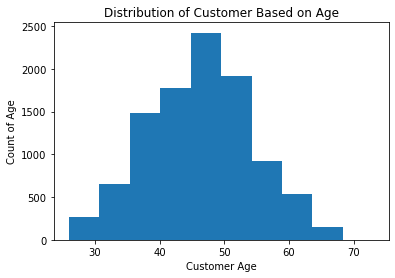

In [15]:
plt.hist(bin_df['Customer_Age'])
plt.xlabel('Customer Age')
plt.ylabel('Count of Age')
plt.title('Distribution of Customer Based on Age')
plt.show()

In [154]:
print(f"Breakdown of statistics for age: \n\n {bin_df['Customer_Age'].describe()}")

Breakdown of statistics for age: 

 count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


<b> Interpretation: </b> Based on the histogram, it is reasonable to assume that the customer age is normally distributed

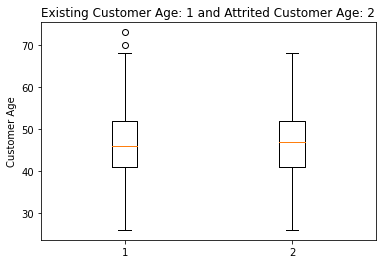

In [28]:
fig, ax = plt.subplots()
ax.boxplot([bin_df['Customer_Age'][bin_df['binary_attrition'] == 1],bin_df['Customer_Age'][bin_df['binary_attrition'] == 0]])
ax.set_title("Existing Customer Age: 1 and Attrited Customer Age: 2")
ax.set_ylabel("Customer Age")
plt.show()

#### Customer Gender

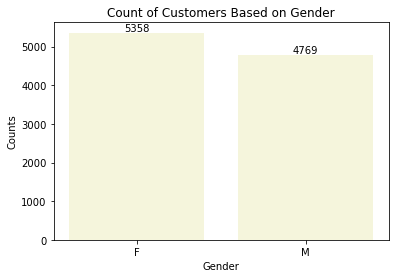

In [41]:
fig, ax = plt.subplots()
bars = ax.bar(bin_df['Gender'].value_counts().index,bin_df['Gender'].value_counts().values, color = 'beige')
ax.bar_label(bars)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Gender')
plt.show()

<b> Interpretation: </b> The counts between males and females appear balanced.

In order to use customer gender in our model, a few changes must be made. Firstly, the gender column must be split into an integer column using 1s and 0s. We split this columns into 1s and 0s knowing that neither being male or female is superior to the other. The new binary gender column is not ranked. We are reclasifying the column because the machine learning algorithms we are using cannot interpret string data.

In [42]:
new_bin_df = pd.get_dummies(bin_df, columns = ['Gender'])

In [43]:
new_bin_df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_F,Gender_M
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,1
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,...,864,7392.0,1.541,1291,33,3.714,0.105,1,1,0
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,1
3,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,...,2517,796.0,1.405,1171,20,2.333,0.760,1,1,0
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,1


We use the get_dummies function from pandas to split the binary data into two columns dedicated to whether the customer is femals or male.

#### Customer Dependent Count

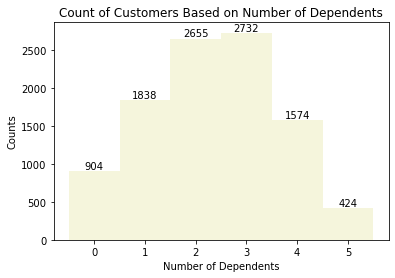

In [132]:
fig, ax = plt.subplots()
bars = ax.bar(new_bin_df['Dependent_count'].value_counts().index,new_bin_df['Dependent_count'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Number of Dependents')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Number of Dependents')
plt.show()

<b> Interpretation: </b> The number of dependents between 2-3 occur the most in the dataset.

#### Customer Education Level

While examing the predictor, a issue arose. This column contained an "Unknown" value. This is most likely a placeholder for customerd that did not have that particular information recorded.

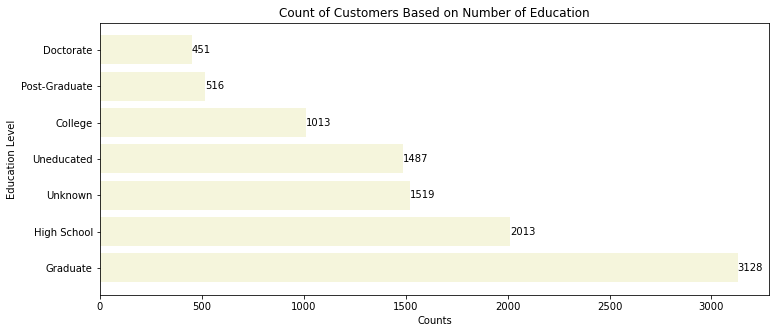

In [59]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.barh(new_bin_df['Education_Level'].value_counts().index,new_bin_df['Education_Level'].value_counts().values, color = 'beige')
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.title('Count of Customers Based on Number of Education')
plt.show()

The unknown value makes up a significant portion of the data. If the observation was small enough, we could consider deleting all rows with that value. Instead we use the mode to impute the "Unknown" rows and replace it with the most common education level.

In [62]:
for index, i in new_bin_df['Education_Level'].items():
    if i == "Unknown":
        new_bin_df['Education_Level'][index] = "Graduate"
new_bin_df['Education_Level'].value_counts()

C:\Users\orteg\AppData\Local\Temp/ipykernel_19628/575657811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Education_Level'][index] = "Graduate"


Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Now that the unknowns observations have been delt with, the next step with the education column can be undertaken. Based on group consensus, the education column will be ranked. The data in the columnn is ordinal and should be appropriately tranformed.

In [67]:
education_rankings = {'College': 2, 'Doctorate': 5, 'Graduate': 3, 'High School': 1, 'Post-Graduate': 4, 'Uneducated': 0}
for ind, i in new_bin_df['Education_Level'].items():
    for index,val in education_rankings.items():
        if index == i:
            new_bin_df['ranked_education'][ind] = val

C:\Users\orteg\AppData\Local\Temp/ipykernel_19628/3507007706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['ranked_education'][ind] = val


In [68]:
new_bin_df['ranked_education'].value_counts()

3    4647
1    2013
0    1487
2    1013
4     516
5     451
Name: ranked_education, dtype: int64

#### Customer Marital Status, Income Category, and Card Category

Marital status is divided into three categories: divorced, single and married. Income category is divided into five categories that end with customers making over 120K. Card category has four options: blue, silver, gold, and platinum. Married, less than 40k, and blue are all the top characteristics of the customers.

The same process that education went through will be replicated for these three columns. So, columns with an unknown value will be imputed with the most commomn value, and a new column will be created for rankings. Card category does not contain an unknown observation and does not have to be imputed.

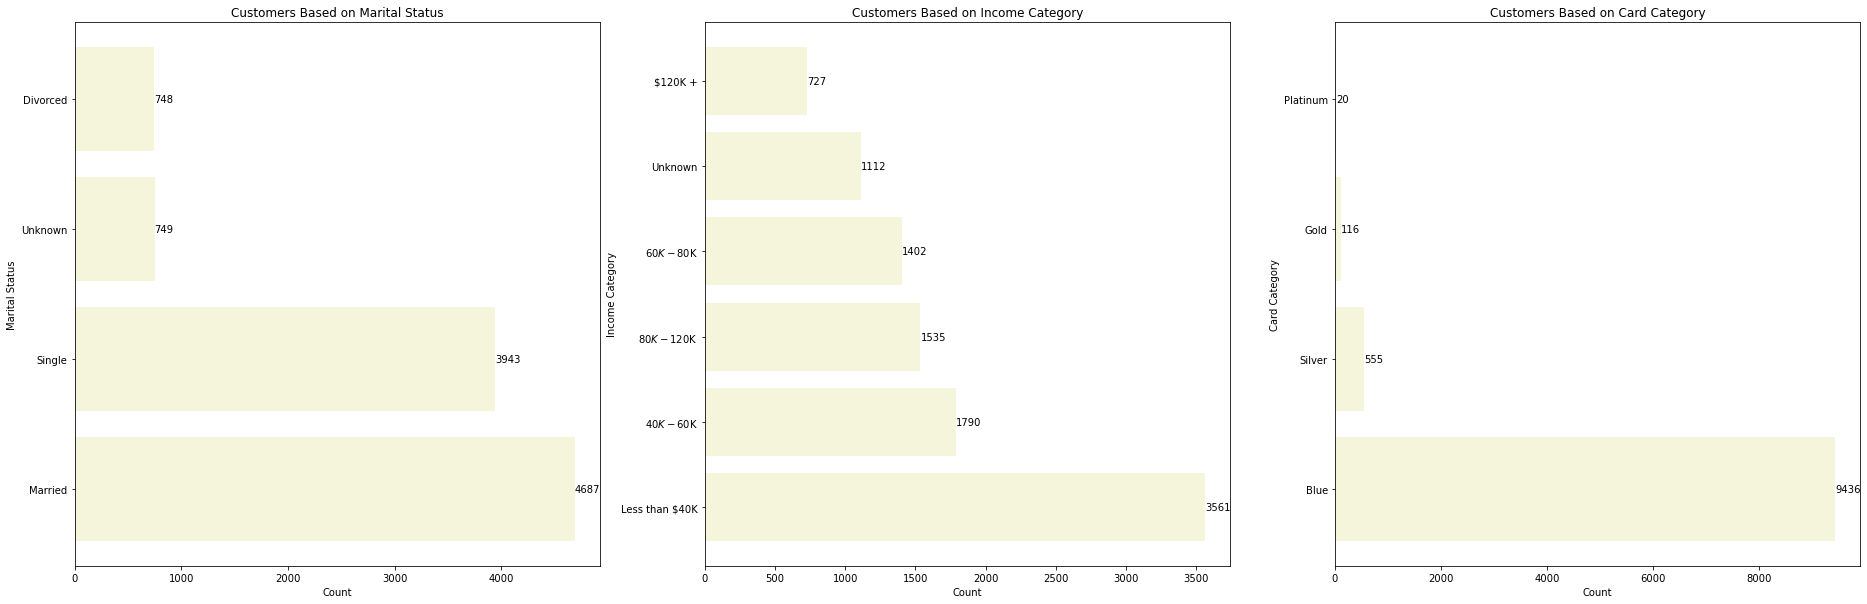

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (32,10))
bars = ax1.barh(new_bin_df['Marital_Status'].value_counts().index,new_bin_df['Marital_Status'].value_counts().values, color = 'beige')
ax1.bar_label(bars)
bars = ax2.barh(new_bin_df['Income_Category'].value_counts().index,new_bin_df['Income_Category'].value_counts().values, color = 'beige')
ax2.bar_label(bars)
bars = ax3.barh(new_bin_df['Card_Category'].value_counts().index,new_bin_df['Card_Category'].value_counts().values, color = 'beige')
ax3.bar_label(bars)
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax3.set_xlabel("Count")
ax1.set_ylabel("Marital Status")
ax2.set_ylabel("Income Category")
ax3.set_ylabel("Card Category")
ax1.set_title("Customers Based on Marital Status")
ax2.set_title("Customers Based on Income Category")
ax3.set_title("Customers Based on Card Category")
plt.show()

In [81]:
for index, i in new_bin_df['Marital_Status'].items():
    if i == "Unknown":
        new_bin_df['Marital_Status'][index] = "Married"
for index, i in new_bin_df['Income_Category'].items():
    if i == "Unknown":
        new_bin_df['Income_Category'][index] = "Less than $40K"

C:\Users\orteg\AppData\Local\Temp/ipykernel_19628/308420836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Marital_Status'][index] = "Married"
C:\Users\orteg\AppData\Local\Temp/ipykernel_19628/308420836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bin_df['Income_Category'][index] = "Less than $40K"


In [92]:
marital_rankings = {'Divorced': 1, 'Married': 2, 'Single': 0}
income_rankings = {'$120K +': 4, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 0}
card_rankings = {'Blue': 0, 'Gold': 2, 'Platinum': 3, 'Silver': 1}
array = []
for ind, i in new_bin_df['Marital_Status'].items():
    for index,val in marital_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_marital'] = array
array = []
for ind, i in new_bin_df['Income_Category'].items():
    for index,val in income_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_income'] = array
array = []
for ind, i in new_bin_df['Card_Category'].items():
    for index,val in card_rankings.items():
        if index == i:
            array.append(val)
new_bin_df['ranked_card'] = array

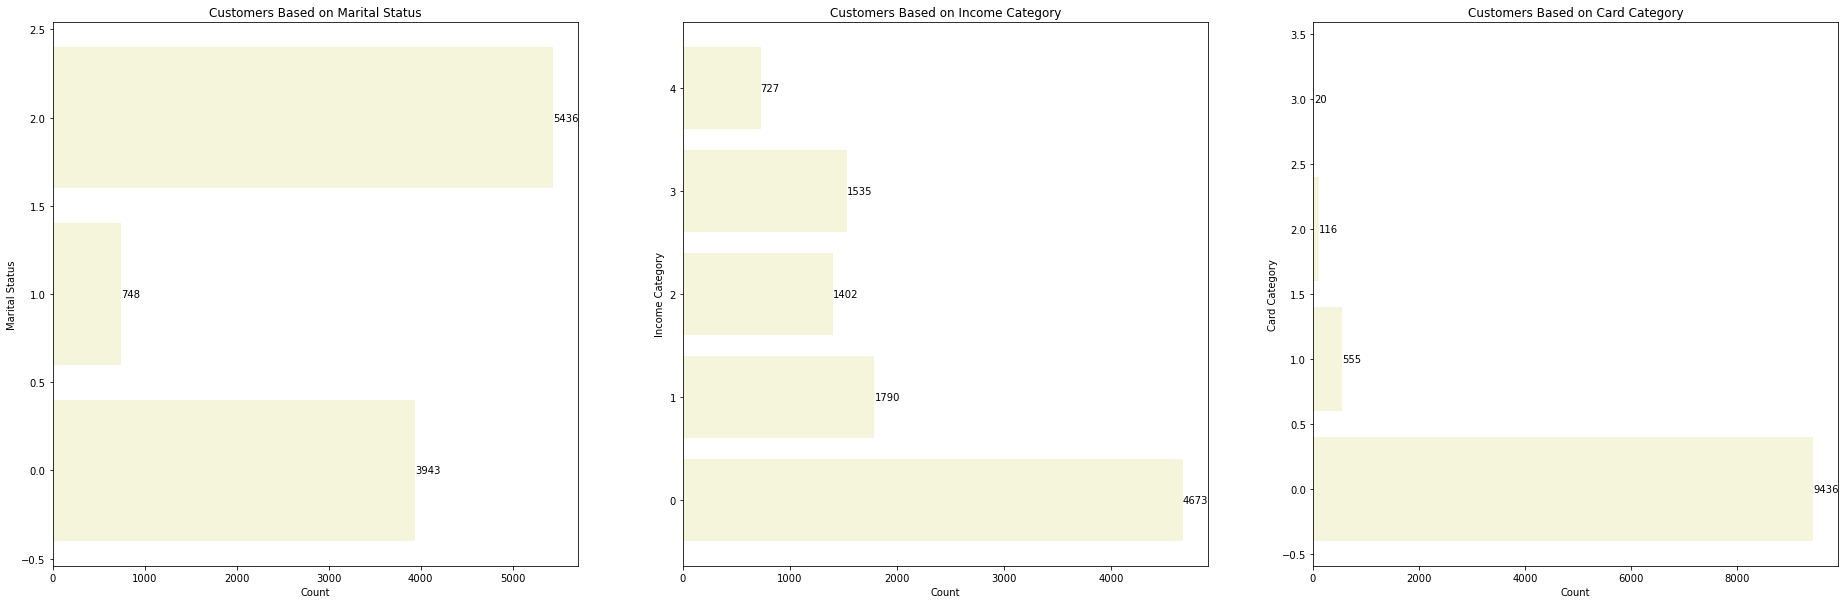

In [93]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (32,10))
bars = ax1.barh(new_bin_df['ranked_marital'].value_counts().index,new_bin_df['ranked_marital'].value_counts().values, color = 'beige')
ax1.bar_label(bars)
bars = ax2.barh(new_bin_df['ranked_income'].value_counts().index,new_bin_df['ranked_income'].value_counts().values, color = 'beige')
ax2.bar_label(bars)
bars = ax3.barh(new_bin_df['ranked_card'].value_counts().index,new_bin_df['ranked_card'].value_counts().values, color = 'beige')
ax3.bar_label(bars)
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax3.set_xlabel("Count")
ax1.set_ylabel("Marital Status")
ax2.set_ylabel("Income Category")
ax3.set_ylabel("Card Category")
ax1.set_title("Customers Based on Marital Status")
ax2.set_title("Customers Based on Income Category")
ax3.set_title("Customers Based on Card Category")
plt.show()

#### Customer Subscription Time with Bank in Months

This column represents the period of time the customer has spent with the bank.

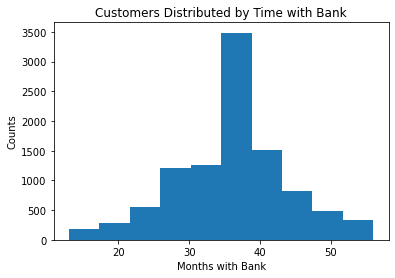

In [97]:
plt.hist(new_bin_df['Months_on_book'])
plt.xlabel("Months with Bank")
plt.ylabel("Counts")
plt.title("Customers Distributed by Time with Bank")
plt.show()

In [153]:
print(f"Breakdown of statistics for time with bank: \n\n {new_bin_df['Months_on_book'].describe()}")

Breakdown of statistics for time with bank: 

 count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64


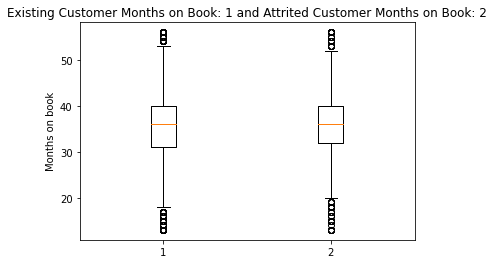

In [100]:
fig, ax = plt.subplots()
ax.boxplot([bin_df['Months_on_book'][bin_df['binary_attrition'] == 1],bin_df['Months_on_book'][bin_df['binary_attrition'] == 0]])
ax.set_title("Existing Customer Months on Book: 1 and Attrited Customer Months on Book: 2")
ax.set_ylabel('Months on book')
plt.show()

#### Customer Relationship Count

The customer relationship measure contains observations based on the number of services a single customer uses. An example might be number of cards.

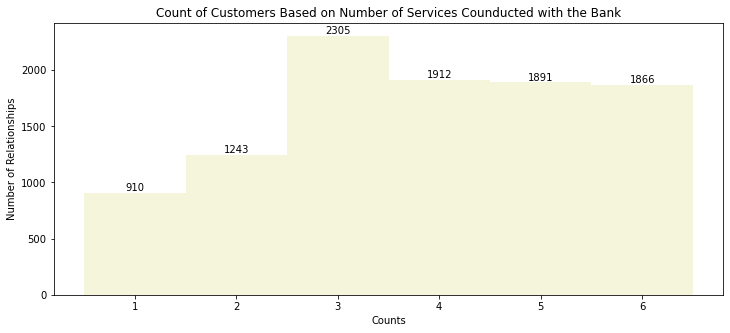

In [131]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.bar(new_bin_df['Total_Relationship_Count'].value_counts().index,new_bin_df['Total_Relationship_Count'].value_counts().values, color = 'beige',  width=1.0)
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Number of Relationships')
plt.title('Count of Customers Based on Number of Services Counducted with the Bank')
plt.show()

#### Customer Inactivity in the Past 12 Months

This column tracks the inactivity of customers. The measure is in months.

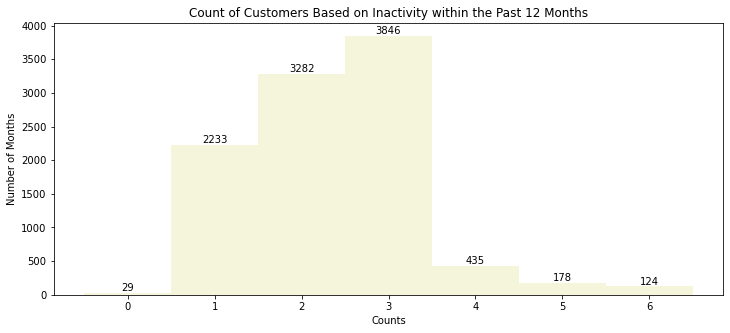

In [130]:
fig, ax = plt.subplots(figsize = (12,5))
bars = ax.bar(new_bin_df['Months_Inactive_12_mon'].value_counts().index,new_bin_df['Months_Inactive_12_mon'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Counts')
plt.ylabel('Number of Months')
plt.title('Count of Customers Based on Inactivity within the Past 12 Months')
plt.show()

Based on what we known of the data, most customers are currently still with the bank. So, it can be expected that most customers will not have a lot of inactivity. We can test this idea of making a side-by-side visualization of bar graphs.

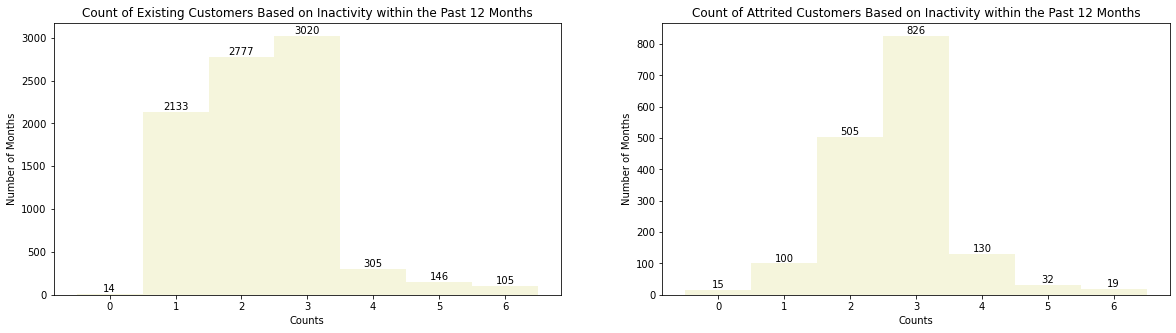

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
bars = ax1.bar(new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 1].value_counts().index,new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 1].value_counts().values, color = 'beige', width=1.0)
ax1.bar_label(bars)
bars = ax2.bar(new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 0].value_counts().index,new_bin_df['Months_Inactive_12_mon'][new_bin_df['binary_attrition'] == 0].value_counts().values, color = 'beige', width=1.0)
ax2.bar_label(bars)
ax1.set_xlabel('Counts')
ax1.set_ylabel('Number of Months')
ax1.set_title('Count of Existing Customers Based on Inactivity within the Past 12 Months')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Number of Months')
ax2.set_title('Count of Attrited Customers Based on Inactivity within the Past 12 Months')
plt.show()

<b> Interpretation: </b> Suprisingly, customer inactivity does not change based on membership with the company. A reason might be because data collection was only taken at a specific pariod of time. Customers that are no longer with the company have not had enough time to build up inactivity.

#### Customer Contacts within the Last 12 Months

This column, and a few others that will be highlighted later, does not efficiently describe its data in the Kaggle repository.

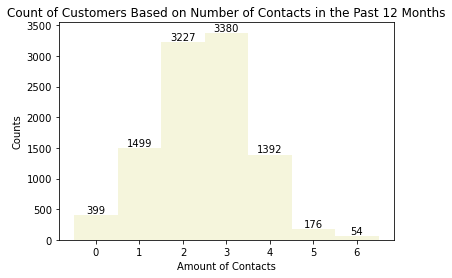

In [137]:
fig, ax = plt.subplots()
bars = ax.bar(new_bin_df['Contacts_Count_12_mon'].value_counts().index,new_bin_df['Contacts_Count_12_mon'].value_counts().values, color = 'beige', width=1.0)
ax.bar_label(bars)
plt.xlabel('Amount of Contacts')
plt.ylabel('Counts')
plt.title('Count of Customers Based on Number of Contacts in the Past 12 Months')
plt.show()

Deciding whether this column will remain in the table will be decided later in the analysis.

#### Customer Credit Limit

The credit limit of the customer is the amount of money the user has to spend per month.

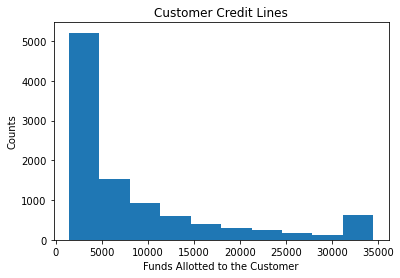

In [118]:
plt.hist(new_bin_df['Credit_Limit'])
plt.xlabel("Funds Allotted to the Customer")
plt.ylabel("Counts")
plt.title("Customer Credit Lines")
plt.show()

In [152]:
print(f"Breakdown of statistics for credit limit: \n\n {new_bin_df['Credit_Limit'].describe()}")

Breakdown of statistics for credit limit: 

 count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


The distribution of the data is not surprising. Many customers do not have the qualifications to receive a high number of credit. This explains the large counts of customers near the lowest credit limits. A case can be made to rank the data similar to the income column.

#### Customer Revolving Balance

This column concerns the amount of money customers maintain in their accounts. If the cusomer has a balance over zero, they will be paying additional interest on that amount in their next payment.

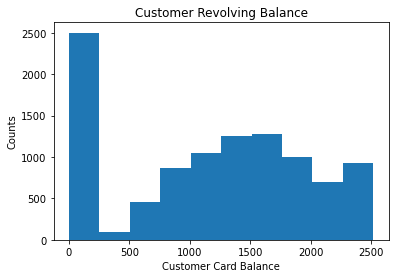

In [122]:
plt.hist(new_bin_df['Total_Revolving_Bal'])
plt.xlabel("Customer Card Balance")
plt.ylabel("Counts")
plt.title("Customer Revolving Balance")
plt.show()

In [151]:
print(f"Breakdown of statistics for revolving balance: \n\n {new_bin_df['Total_Revolving_Bal'].describe()}")

Breakdown of statistics for revolving balance: 

 count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64


<b> Interpretation: </b> Unfortunately, it appears that most customers are not paying off their credit card balances. Those customers will be paying interest on their accounts. A question now might be what the difference is between existing and non-existing customers.

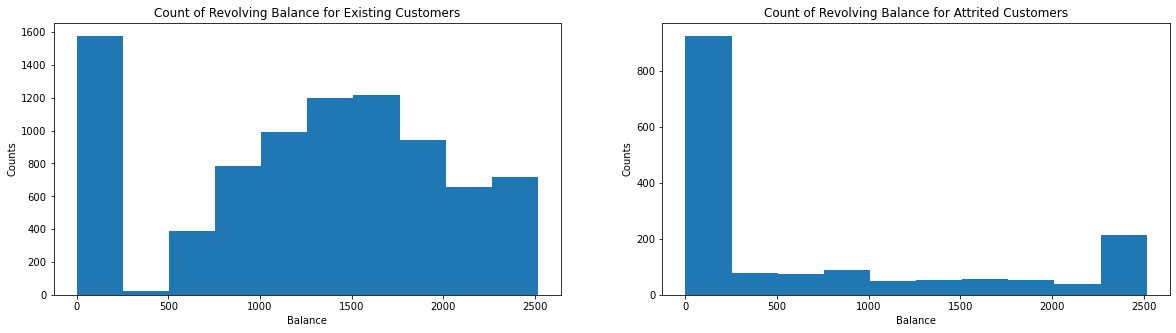

In [134]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Total_Revolving_Bal'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Total_Revolving_Bal'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Balance')
ax1.set_title('Count of Revolving Balance for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Balance')
ax2.set_title('Count of Revolving Balance for Attrited Customers')
plt.show()

It appears that most customers no longer with the bank have paid off their balance. However, many customers appear to still have balance. Depending on the current policies, banks may never get paid by the customer. Active customers have a wider range in balance.

#### Customer Average open to buy

According to Google: "Open to Buy means maximum amount that Cardholder is permitted to spend using Credit Card from time to time which equals the Limit minus the Outstanding Balance."

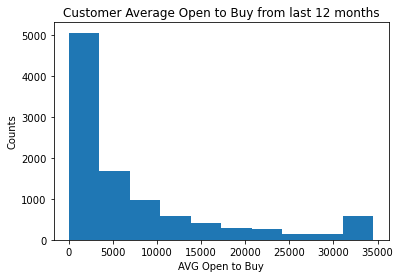

In [139]:
plt.hist(new_bin_df['Avg_Open_To_Buy'])
plt.xlabel("AVG Open to Buy")
plt.ylabel("Counts")
plt.title("Customer Average Open to Buy from last 12 months")
plt.show()

In [150]:
print(f"Breakdown of statistics for open to buy: \n\n {new_bin_df['Avg_Open_To_Buy'].describe()}")

Breakdown of statistics for open to buy: 

 count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64


<b> Interpretation: </b> It appears that many customers are spending their entire credit limit on average. There is one customer that is not spending any money on their account. This is found by comparing the max credit limit with this metric.

#### Customer Total Amount of Change (Quarter 4 Over Quarter 1)

This is another column with limited citations.

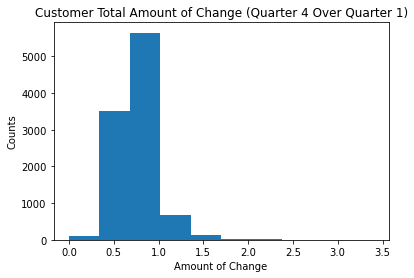

In [141]:
plt.hist(new_bin_df['Total_Amt_Chng_Q4_Q1'])
plt.xlabel("Amount of Change")
plt.ylabel("Counts")
plt.title("Customer Total Amount of Change (Quarter 4 Over Quarter 1)")
plt.show()

In [149]:
print(f"Breakdown of statistics for amount change: \n\n {new_bin_df['Total_Amt_Chng_Q4_Q1'].describe()}")

Breakdown of statistics for amount change: 

 count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64


#### Customer Transaction Amount with Card

This column notes the monetary value of transactions made by the customer over the last 12 months.

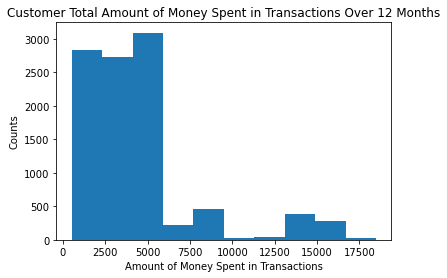

In [157]:
plt.hist(new_bin_df['Total_Trans_Amt'])
plt.xlabel("Amount of Money Spent in Transactions")
plt.ylabel("Counts")
plt.title("Customer Total Amount of Money Spent in Transactions Over 12 Months")
plt.show()

In [147]:
print(f"Breakdown of statistics for transaction Amounts: \n\n {new_bin_df['Total_Trans_Amt'].describe()}")

Breakdown of statistics for transaction counts: 

 count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64


<b> Interpretation: </b> Customers appear to be making small transactions with their card that accumulate over a year. The largest amount is only 18 thousand. That amount is only about half of the largest credit limit!

#### Customer Total Count of Transactions

This column tracks the number of transactions made over the last 12 months.

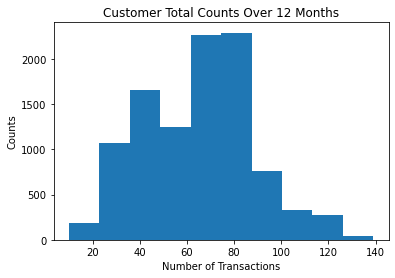

In [159]:
plt.hist(new_bin_df['Total_Trans_Ct'])
plt.xlabel("Number of Transactions")
plt.ylabel("Counts")
plt.title("Customer Total Counts Over 12 Months")
plt.show()

In [158]:
print(f"Breakdown of statistics for transaction counts: \n\n {new_bin_df['Total_Trans_Ct'].describe()}")

Breakdown of statistics for transaction counts: 

 count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64


Even though many customers have low credit limits, they are still conducting many transactions. Credit cards can be used to make quick purchases when cash is not on hand.

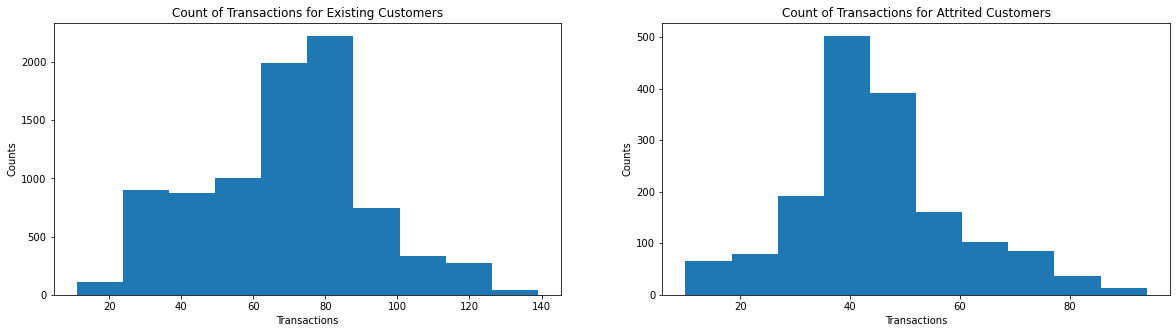

In [160]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Total_Trans_Ct'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Total_Trans_Ct'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Transactions')
ax1.set_title('Count of Transactions for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Transactions')
ax2.set_title('Count of Transactions for Attrited Customers')
plt.show()

<b> Interpretation: </b> The attrited customers have less overall transactions; however, if they stopped using the card, they won't be posting their regular transactions for the months they left.

#### Customer Change in Transaction Count (Q4 Over Q1)

This column compares the amount of transactions made by customers in the fourth quarter based on the first quarter.

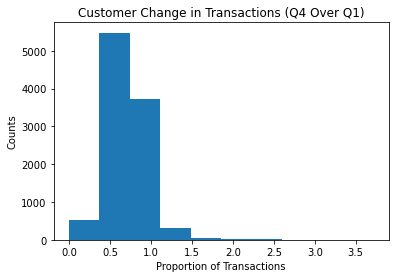

In [167]:
plt.hist(new_bin_df['Total_Ct_Chng_Q4_Q1'])
plt.xlabel("Proportion of Transactions")
plt.ylabel("Counts")
plt.title("Customer Change in Transactions (Q4 Over Q1)")
plt.show()

In [168]:
print(f"Breakdown of statistics for transaction change: \n\n {new_bin_df['Total_Ct_Chng_Q4_Q1'].describe()}")

Breakdown of statistics for transaction change: 

 count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


<b> Interpretation: </b> Customers appear to be using the card less towards the end of the year than in the beginning.

#### Customer Card Utilization 

This column is a pre-designed metric that determines the average utilization of the card per customer.

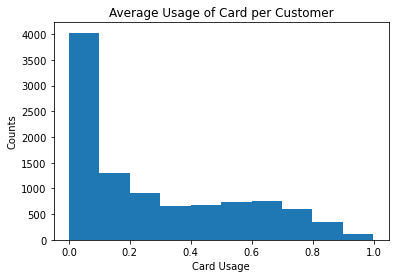

In [169]:
plt.hist(new_bin_df['Avg_Utilization_Ratio'])
plt.xlabel("Card Usage")
plt.ylabel("Counts")
plt.title("Average Usage of Card per Customer")
plt.show()

In [170]:
print(f"Breakdown of statistics for card usage: \n\n {new_bin_df['Avg_Utilization_Ratio'].describe()}")

Breakdown of statistics for card usage: 

 count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64


<b> Interpretation: </b> A large portion of card holders a rated as not using their card frequently.

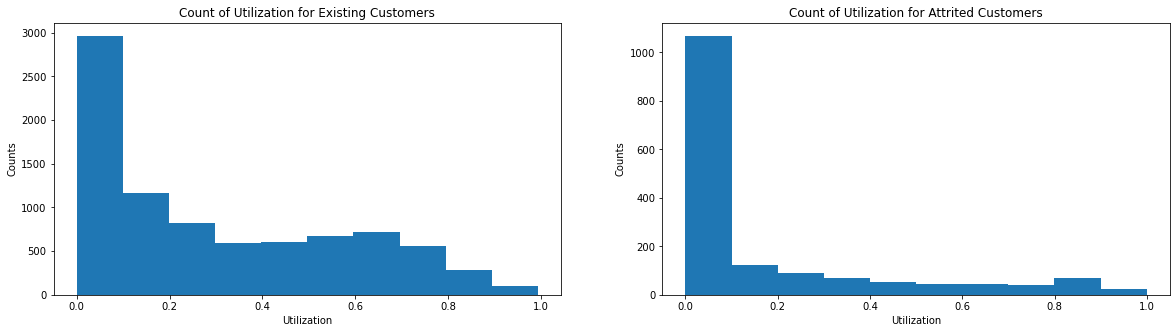

In [172]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
ax1.hist(new_bin_df['Avg_Utilization_Ratio'][new_bin_df['binary_attrition'] == 1])
ax2.hist(new_bin_df['Avg_Utilization_Ratio'][new_bin_df['binary_attrition'] == 0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('Utilization')
ax1.set_title('Count of Utilization for Existing Customers')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Utilization')
ax2.set_title('Count of Utilization for Attrited Customers')
plt.show()

Both distributions look similar to one another.

## Cleaning Up the Data Frame

This will be a small portion that double checks the data frame and removes any columns that are no longer needed. Section will also display column information.

In [173]:
new_bin_df.head()

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_F,Gender_M,ranked_education,ranked_marital,ranked_income,ranked_card
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,...,42,1.625,0.061,1,0,1,1,2,2,0
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,...,33,3.714,0.105,1,1,0,3,0,0,0
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,...,20,2.333,0.000,1,0,1,3,2,3,0
3,40,4,High School,Married,Less than $40K,Blue,34,3,4,1,...,20,2.333,0.760,1,1,0,1,2,0,0
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,...,28,2.500,0.000,1,0,1,0,2,2,0


In [174]:
new_bin_df.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'binary_attrition', 'Gender_F', 'Gender_M', 'ranked_education',
       'ranked_marital', 'ranked_income', 'ranked_card'],
      dtype='object')

In [176]:
clean_df = new_bin_df.drop(['Education_Level','Marital_Status','Income_Category','Card_Category'], axis = 1)

In [177]:
clean_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,binary_attrition,Gender_F,Gender_M,ranked_education,ranked_marital,ranked_income,ranked_card
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,0,1,1,2,2,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,1,1,0,3,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,0,1,3,2,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,20,2.333,0.760,1,1,0,1,2,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,28,2.500,0.000,1,0,1,0,2,2,0


In [178]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  binary

## Correlations Between Variables

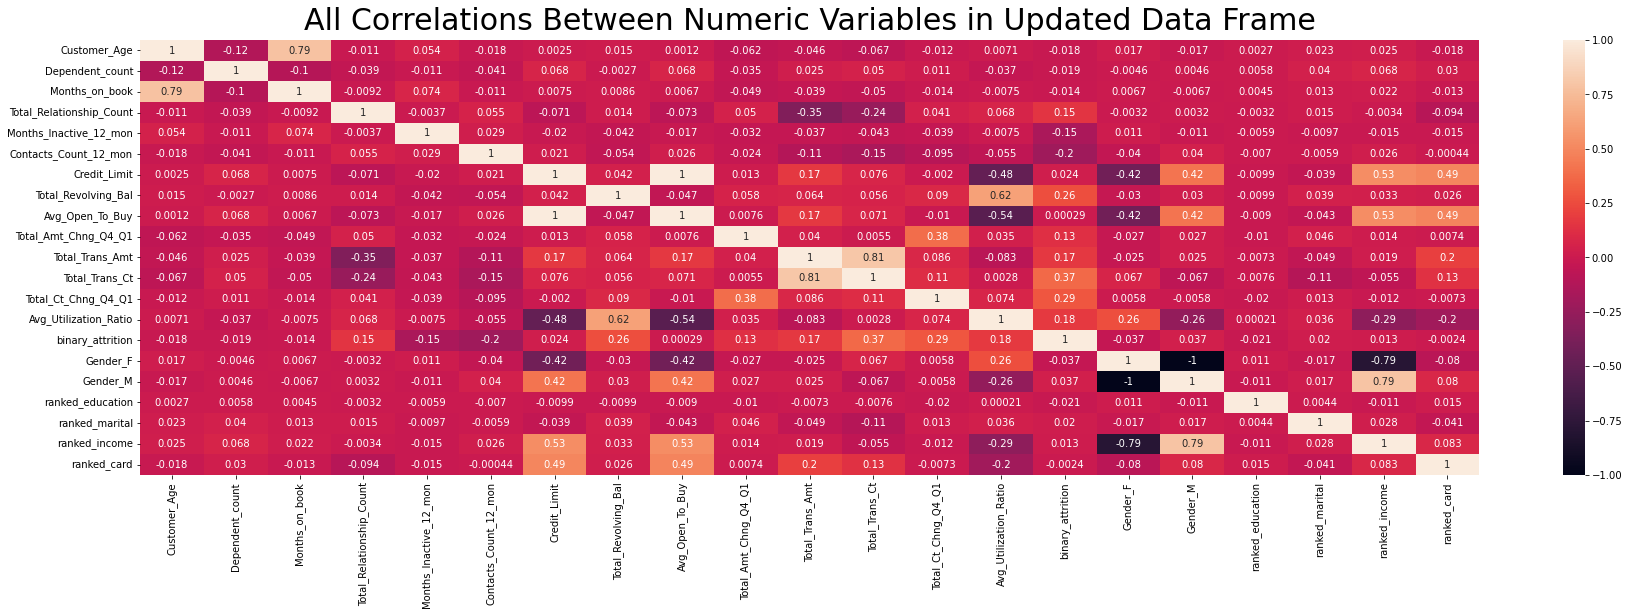

In [186]:
heat = clean_df.corr()
plt.figure(figsize=[30,8])
plt.title("All Correlations Between Numeric Variables in Updated Data Frame", size=30, pad=10)
sns.heatmap(heat, annot=True)
plt.show()

<b> Analysis: </b> There are a few relationships that are worth noting:

- Gender and income has a strong correlation. 
 - It is unclear why gender has such a strong relationship with income. It is possible that the company interacts with specific customers with specific traits.

- Months with the company and customer age has a strong correlation. 
 - This relation could imply that the older you are, the more likely you want to settle with a bank rather than keep looking.

- Revolving balance and utilization has a noticeable correlation. 
 - The more customers use their card, the larger the balance gets.

- Transaction amount and number of transactions correlate strongly. 
 - The more transactions the customer makes, the more money the customer accrues on the card.

- The strongest correlation is between the average open to buy and the credit limit.
 - Customers with larger credit limits appear to be paying off their balances more.

## Next Steps: Conclude table changes, make any knew changes, explain final thoughts, add any other visuals, move onto ML algorithms